In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 64.9 MB/s eta 0:00:00


In [ ]:
import mne

# Set the path to the dataset files
data_path = '/content/drive/My Drive/BCI_IV_2a/'

# # Load the dataset
raw = mne.io.read_raw_gdf(data_path + 'A01T.gdf', preload=True)

Extracting EDF parameters from /content/drive/My Drive/BCI_IV_2a/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [ ]:
# drop the EOG channels we do not use
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
# rename the channels
mne.rename_channels(raw.info, {
    'EEG-Fz': 'Fz', 'EEG-0': 'FC3', 'EEG-1': 'FC1', 'EEG-2': 'FCz', 'EEG-3': 'FC2',
    'EEG-4': 'FC4', 'EEG-5': 'C5', 'EEG-C3': 'C3', 'EEG-6': 'C1', 'EEG-Cz': 'Cz',
    'EEG-7': 'C2', 'EEG-C4': 'C4', 'EEG-8': 'C6', 'EEG-9': 'CP3', 'EEG-10': 'CP1',
    'EEG-11': 'CPz', 'EEG-12': 'CP2', 'EEG-13': 'CP4', 'EEG-14': 'P1', 'EEG-Pz': 'Pz',
    'EEG-15': 'P2', 'EEG-16': 'POz'})

Raw data information: <Info | 8 non-empty values
 bads: []
 ch_names: Fz, FC3, FC1, FCz, FC2, FC4, C5, C3, C1, Cz, C2, C4, C6, CP3, ...
 chs: 22 EEG
 custom_ref_applied: False
 dig: 25 items (3 Cardinal, 22 EEG)
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 22
 projs: []
 sfreq: 250.0 Hz
>
Using matplotlib as 2D backend.


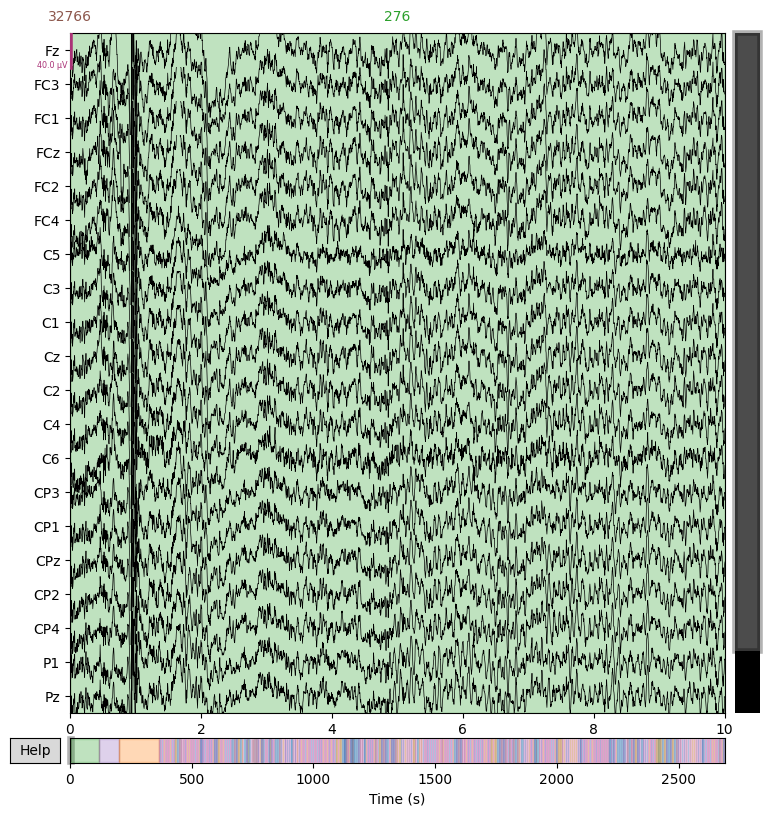

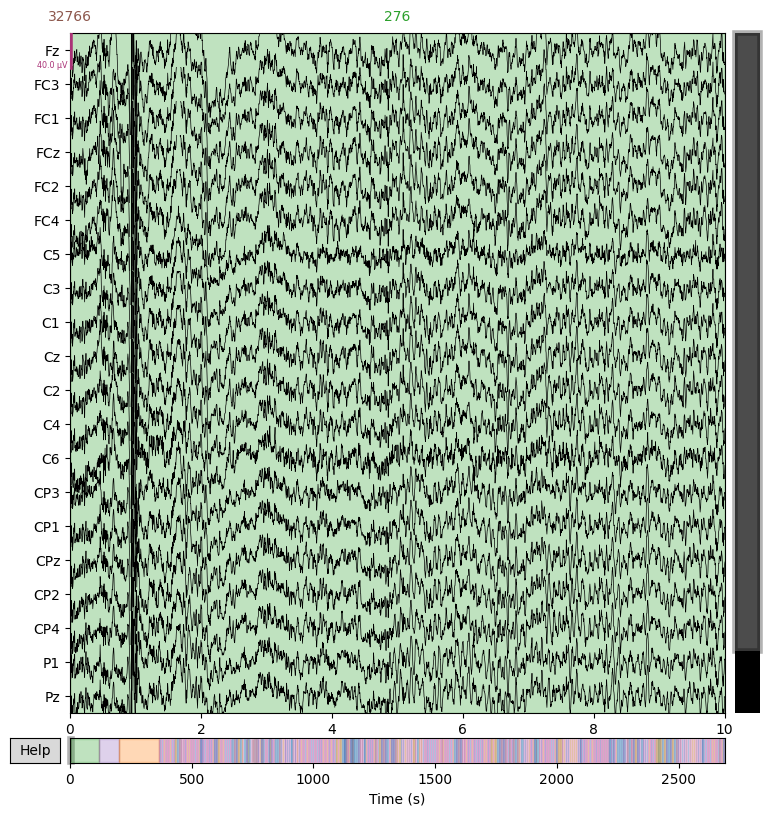

In [ ]:
# set montage of the channels
raw.set_montage(mne.channels.make_standard_montage('standard_1020'))

print("Raw data information:", raw.info)

# Plot the raw data
raw.plot()

In [ ]:
# filter raw data (8Hz,30Hz)
filtered_raw_data = raw.copy().filter(l_freq=7, h_freq=35)
# raw_data.plot(title='no filter raw data')
# filtered_raw_data.plot(title='filtered data')
raw_data = filtered_raw_data
del filtered_raw_data

# resample the data to 100Hz
raw_data.resample(sfreq=200)
print(raw_data.info)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.3s finished


<Info | 8 non-empty values
 bads: []
 ch_names: Fz, FC3, FC1, FCz, FC2, FC4, C5, C3, C1, Cz, C2, C4, C6, CP3, ...
 chs: 22 EEG
 custom_ref_applied: False
 dig: 25 items (3 Cardinal, 22 EEG)
 highpass: 7.0 Hz
 lowpass: 35.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 22
 projs: []
 sfreq: 200.0 Hz
>


In [ ]:
import numpy as np
from scipy import signal

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

In [ ]:
from sklearn.decomposition import FastICA, PCA

# Compute ICA
ica = FastICA(n_components=3, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

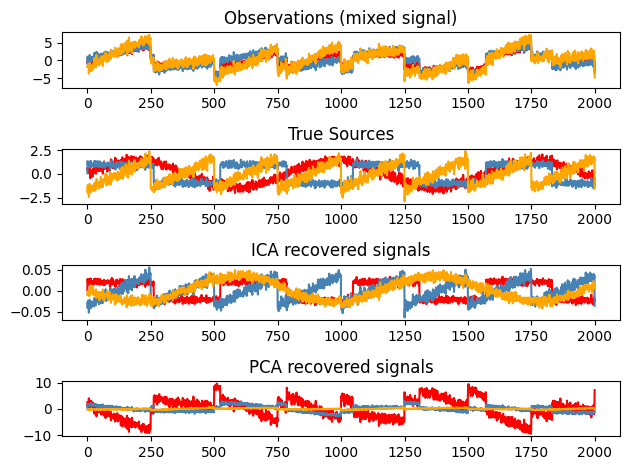

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

models = [X, S, S_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [ ]:
# rename annotation description to reject when segmenting epochs (origin dataset description '1023')
raw_data.annotations.rename({'1023': 'bad_1023'})

<Annotations | 603 segments: 1072 (1), 276 (1), 277 (1), 32766 (9), 768 ...>

Used Annotations descriptions: ['1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
15 bad epochs dropped
epochs information:  <Epochs |  273 events (all good), -0.2 – 0.8 s, baseline -0.2 – 0 s, ~9.2 MB, data loaded,
 'left': 69
 'right': 69
 'foot': 68
 'tongue': 67>
epochs dropped for:  {('bad_1023',), ('IGNORED',), ()}
Not setting metadata
69 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


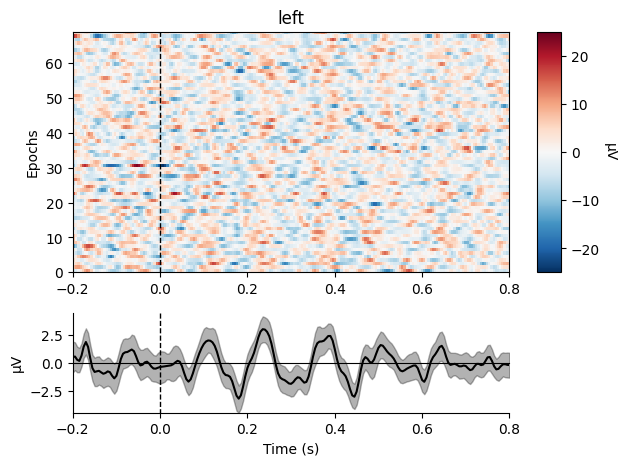

Not setting metadata
69 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


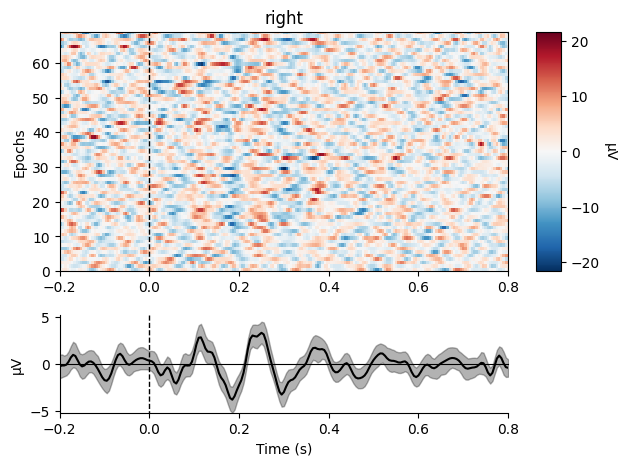

Not setting metadata
68 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


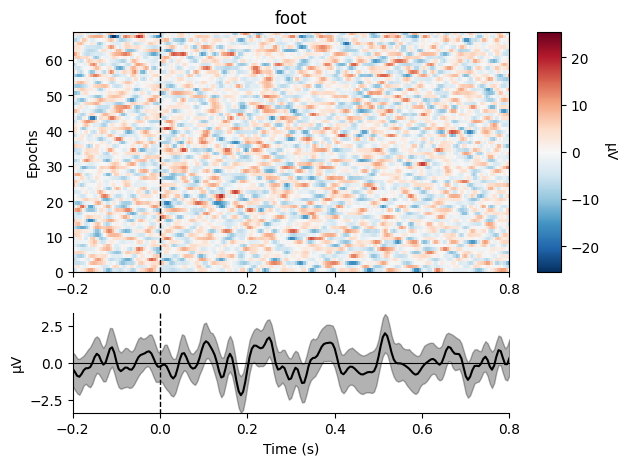

Not setting metadata
67 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


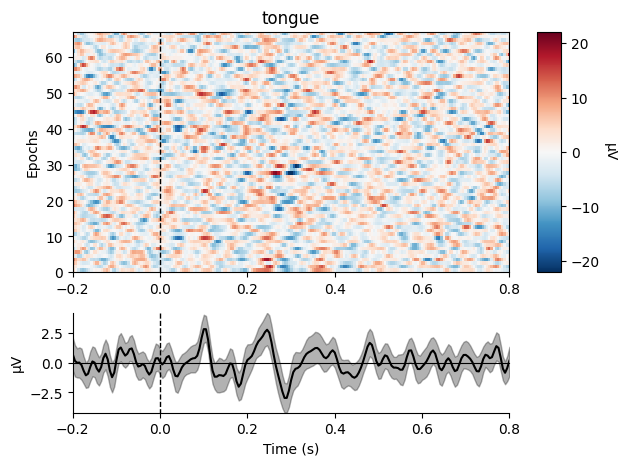

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


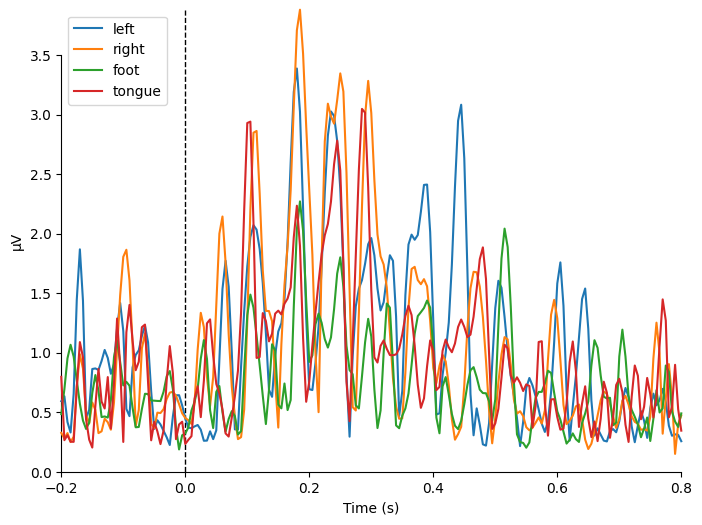

[<Figure size 800x600 with 1 Axes>]

In [ ]:
# get events from annotations
events_mapping = {'276':276, '277':277, '768':768, '769':769, '770':770, '771':771, '772':772, '783':783, 'bad_1023':1023, '1072': 1072, '32766':32766}
events, _ = mne.events_from_annotations(raw_data, event_id=events_mapping)

# segment into epochs by events(-0.2s 0.8s)
epochs = mne.Epochs(raw_data, events, tmin=-0.2, tmax=0.8, event_repeated='merge',preload=True, event_id={'left':769, 'right': 770, 'foot': 771, 'tongue':772})
print("epochs information: ", epochs)
print("epochs dropped for: ", set(epochs.drop_log))

# visualize the average epochs fig for 4 classes
epochs['left'].plot_image(title='left', combine='mean')
epochs['right'].plot_image(title='right', combine='mean')
epochs['foot'].plot_image(title='foot', combine='mean')
epochs['tongue'].plot_image(title='tongue', combine='mean')

# plot the evoked fig
evoked_dict = {'left': epochs['left'].average(), 'right': epochs['right'].average(), 'foot': epochs['foot'].average(), 'tongue': epochs['tongue'].average()}
mne.viz.plot_compare_evokeds(evoked_dict)

In [ ]:
# convert to Dataframe class
epochs_df = epochs.to_data_frame()
print(epochs_df.iloc[100:110,:6])

      time condition  epoch         Fz       FC3        FC1
100  0.300    tongue      8 -13.086987 -9.004095 -10.991960
101  0.305    tongue      8 -11.126983 -7.368339  -8.456071
102  0.310    tongue      8  -7.248403 -6.041770  -5.577660
103  0.315    tongue      8  -3.820124 -5.873703  -4.011240
104  0.320    tongue      8  -3.015198 -6.899472  -4.702958
105  0.325    tongue      8  -4.628753 -8.257781  -6.739067
106  0.330    tongue      8  -5.937488 -8.680188  -7.656162
107  0.335    tongue      8  -4.027705 -7.205158  -5.339250
108  0.340    tongue      8   1.508393 -3.632486   0.087853
109  0.345    tongue      8   8.147499  1.491696   6.255920
